In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
import seaborn as sns
import datetime as dt


In [2]:
df=pd.read_excel('/content/Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

<ipython-input-8-7e2c0916df16>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [9]:
# Feature Engineering
df['Day_of_Journey']=df['Date_of_Journey'].dt.day
df['Month_of_Journey']=df['Date_of_Journey'].dt.month

In [10]:
df['Dep_hr']=df['Dep_Time'].dt.hour
df['Dep_min']=df['Dep_Time'].dt.minute

In [11]:
df['Arrival_hr']=df['Arrival_Time'].dt.hour
df['Arrival_min']=df['Arrival_Time'].dt.minute

In [12]:
df.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [13]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [14]:
duration=df['Duration'].str.split(' ',expand=True)
duration[1].fillna('00m',inplace=True)
df['duration_hr']=duration[0].apply(lambda x: x[:-1]).astype(int)
df['duration_min']=duration[1].apply(lambda x: x[:-1]).astype(int)

In [15]:
df.drop('Duration',axis=1,inplace=True)

In [16]:
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

In [17]:
# Count of Airlines
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

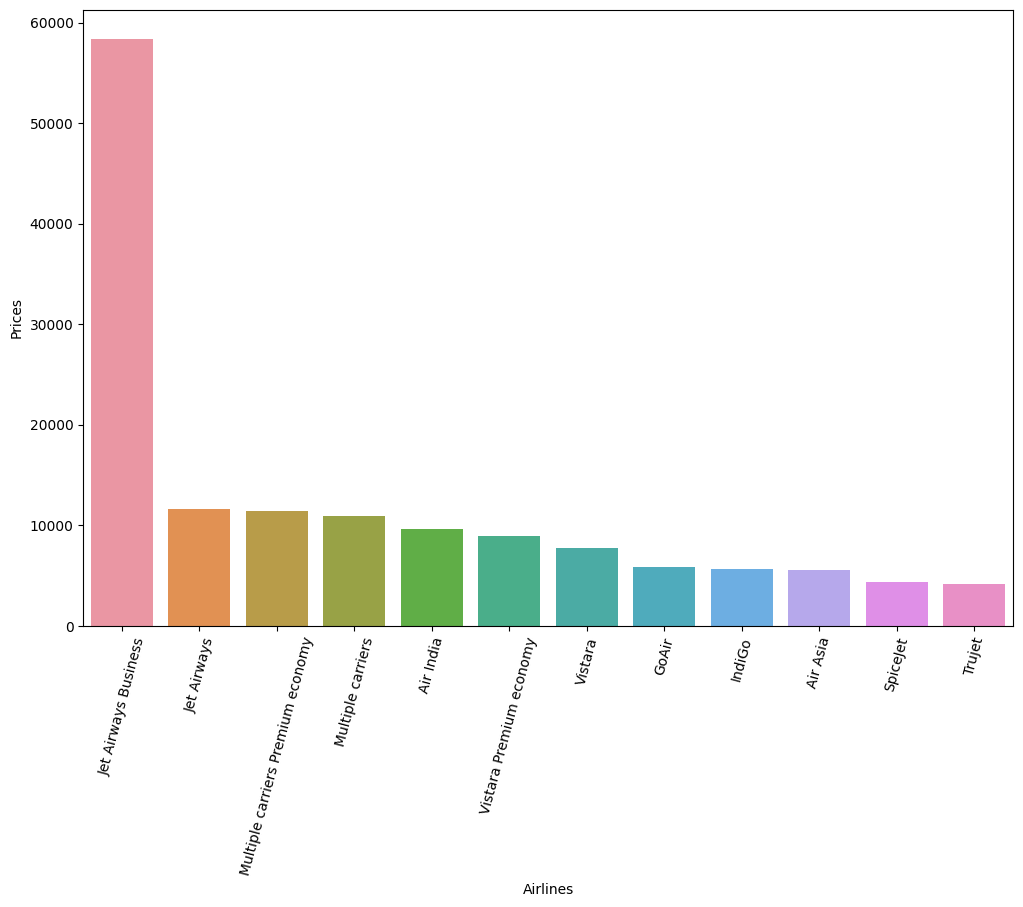

In [18]:
plt.figure(figsize=(12,8))
air_price=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=air_price.index,y=air_price.values)
plt.xlabel('Airlines')
plt.ylabel('Prices')
plt.xticks(rotation=75)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

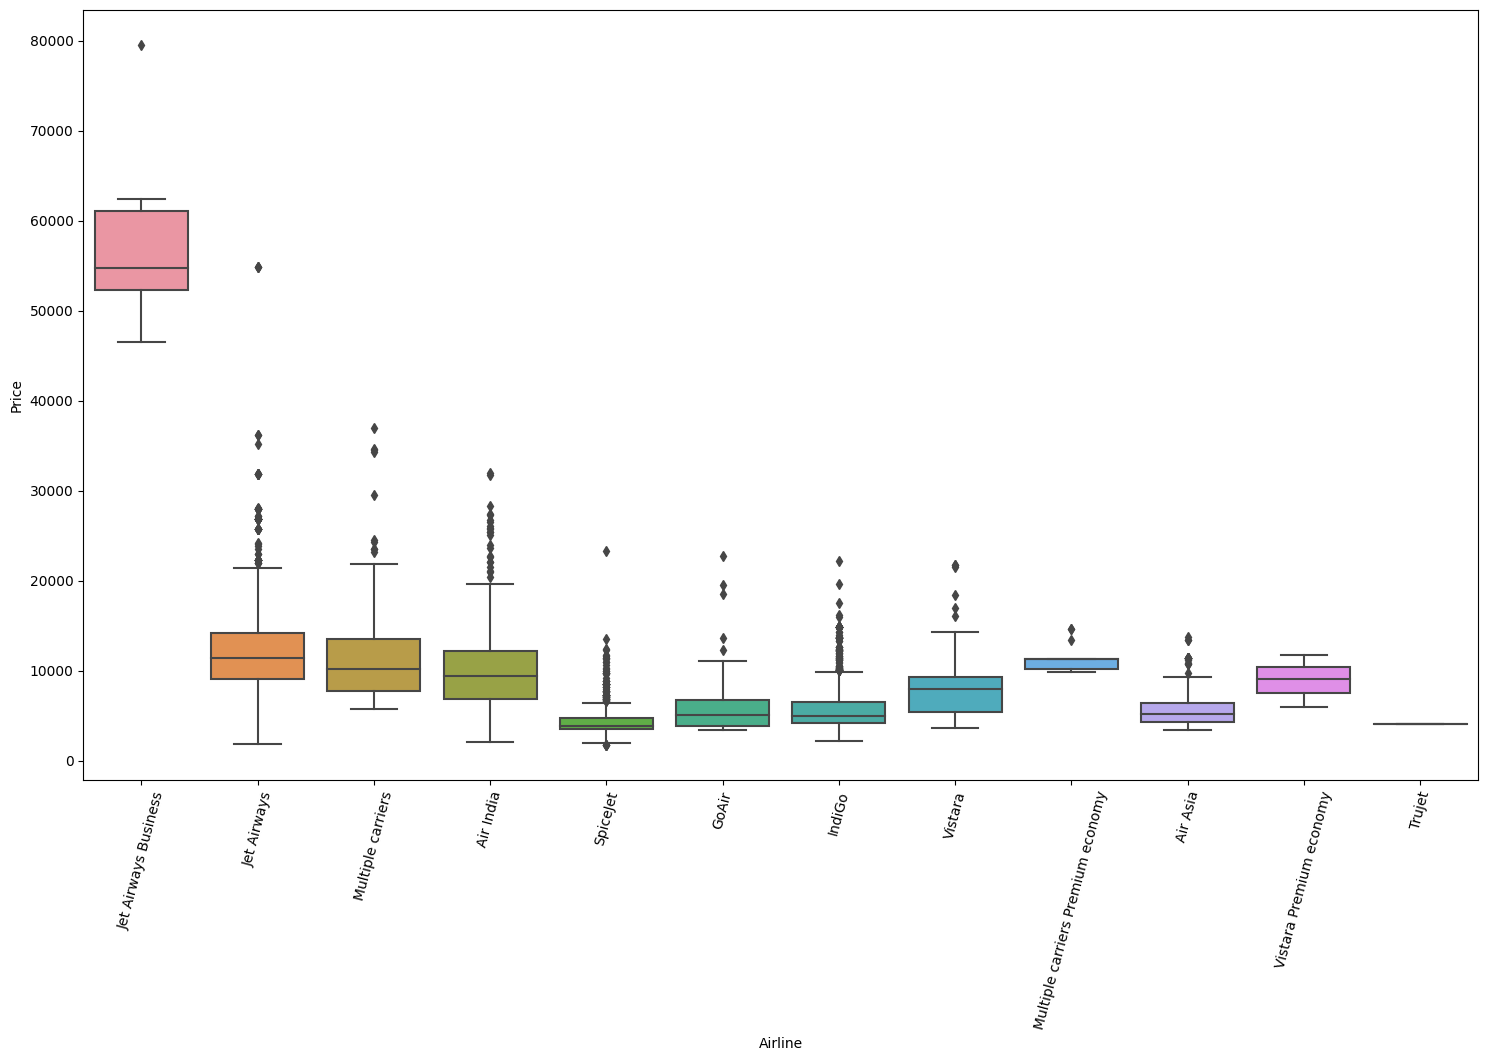

In [19]:
plt.figure(figsize=(18,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.xticks(rotation=75)
plt.show

In [20]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

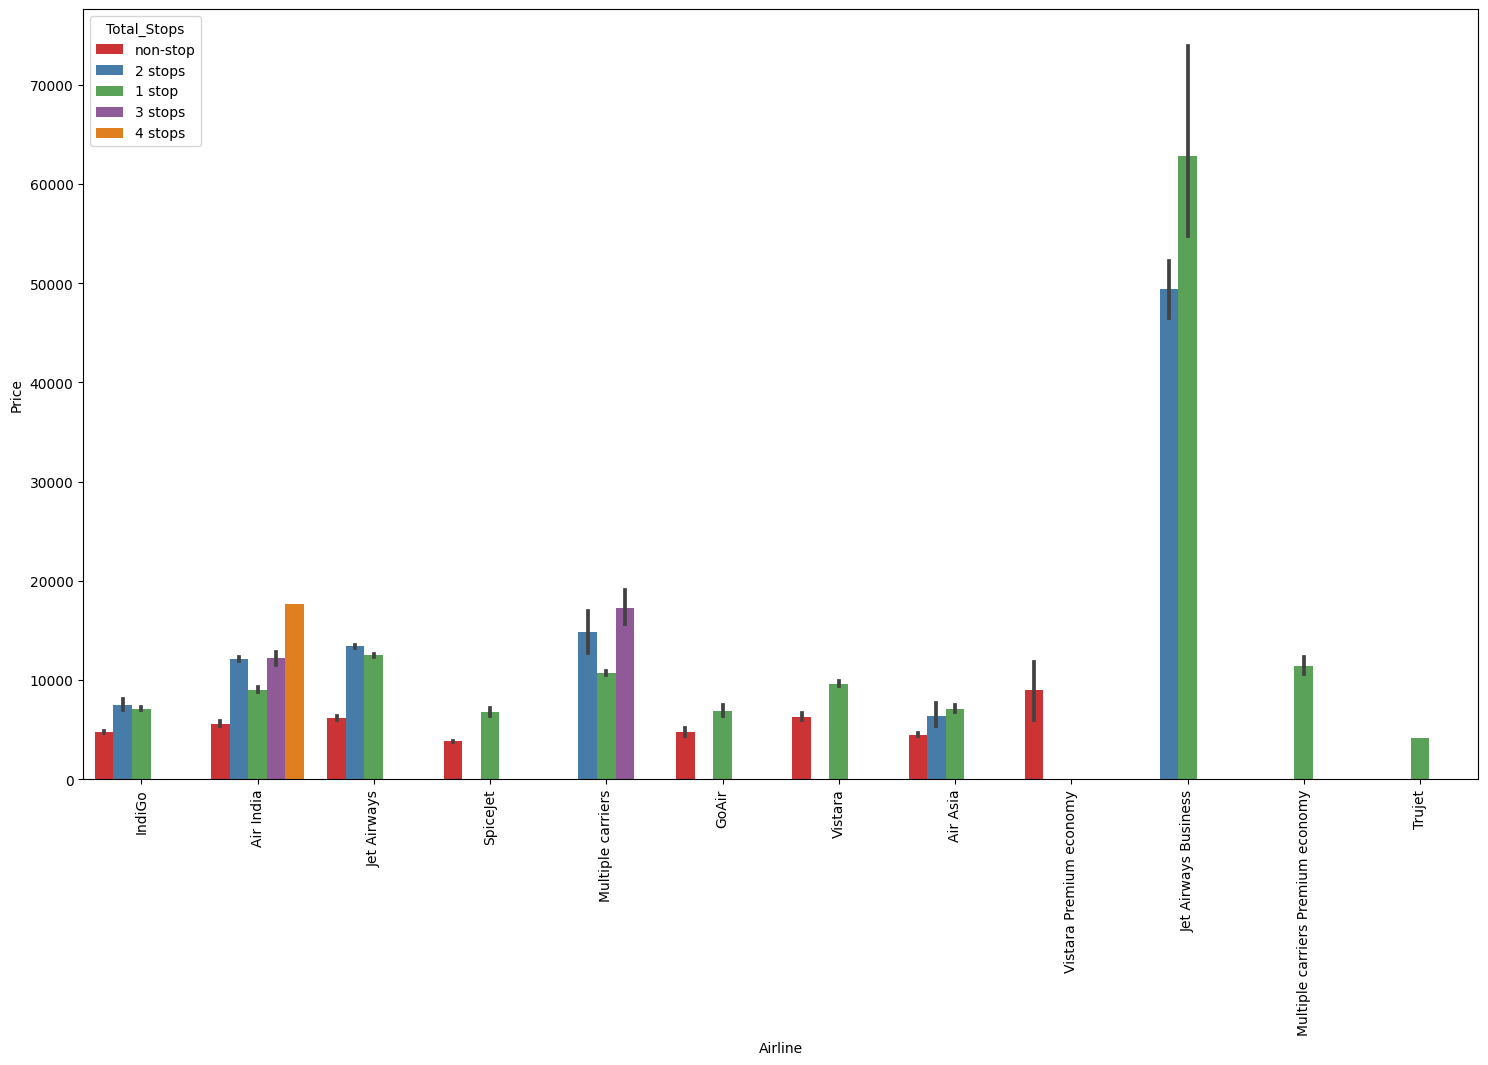

In [21]:
plt.figure(figsize=(18,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()


One stop and two stpos Jet Airways Business is having the highest price

In [22]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

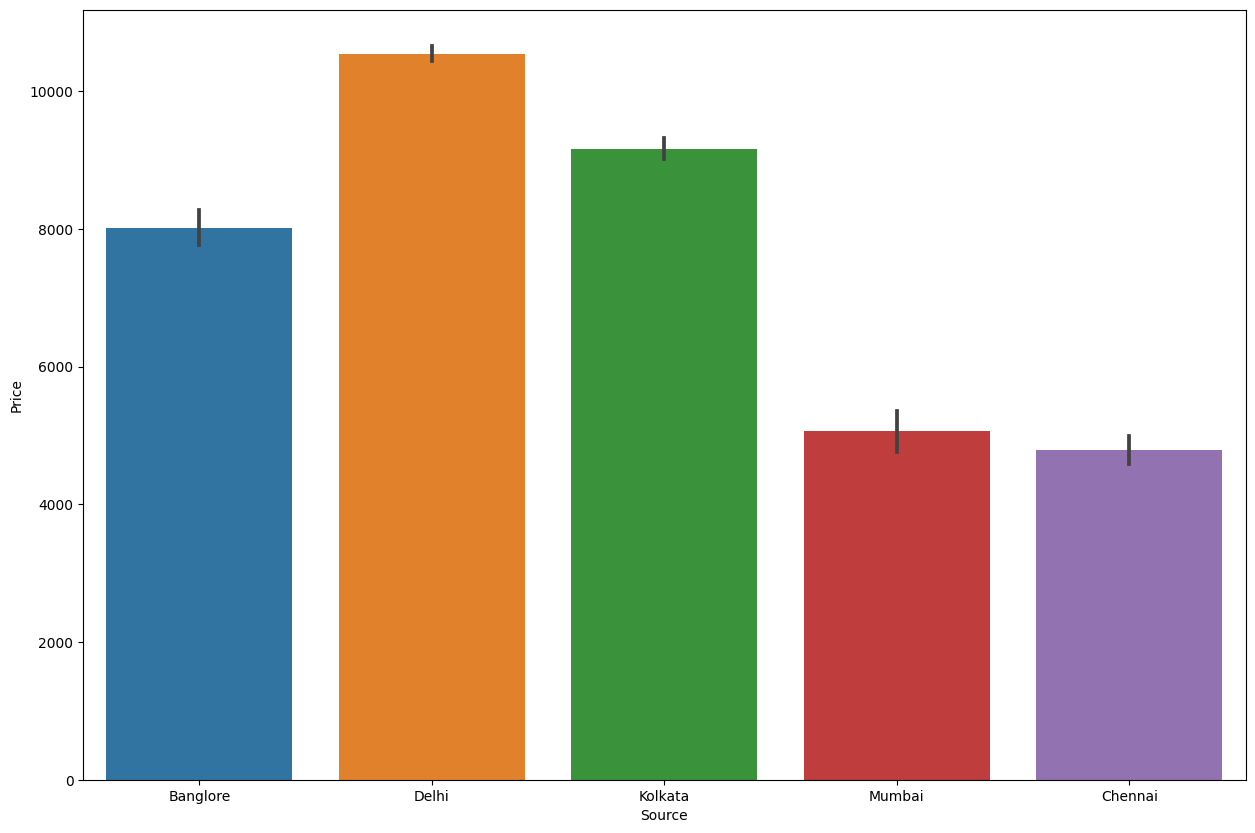

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show()

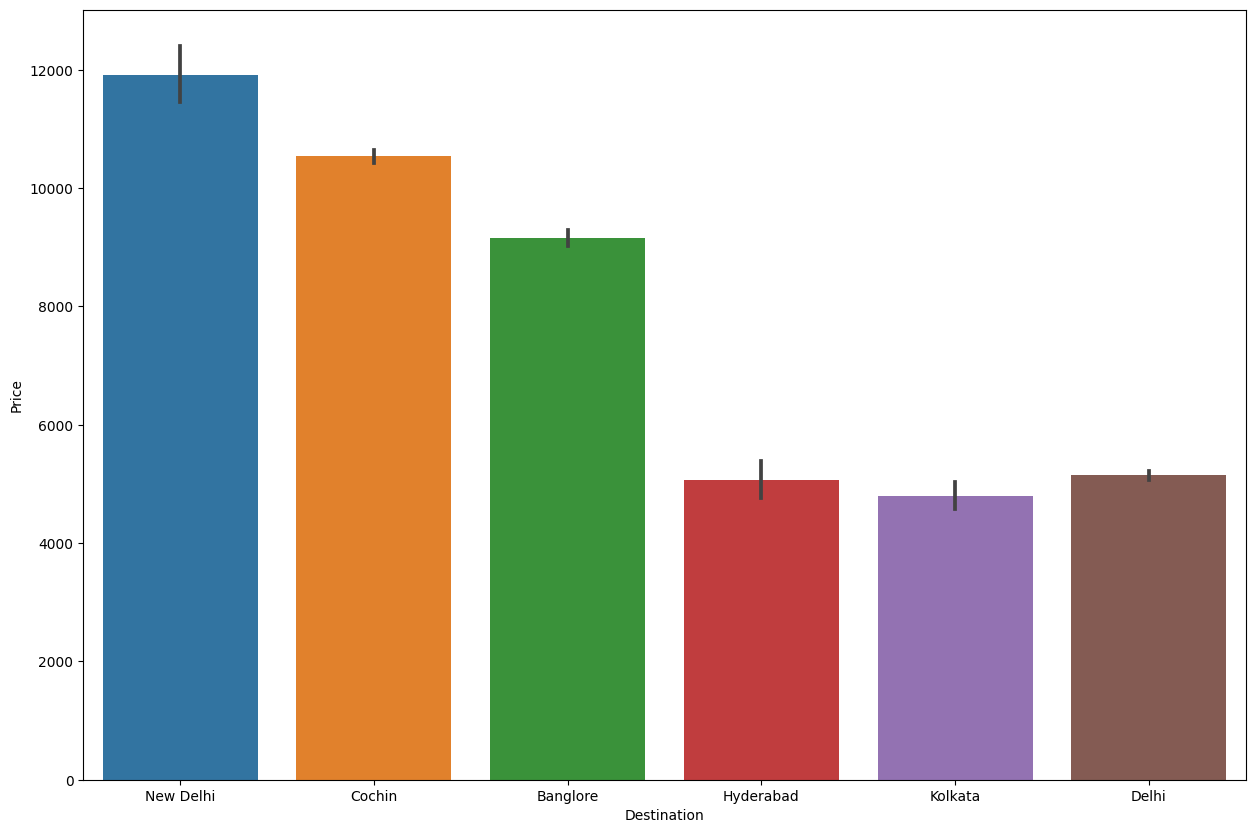

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()

In [25]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [26]:
for i in df:
  df.replace('New Delhi','Delhi',inplace=True)

In [27]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [28]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

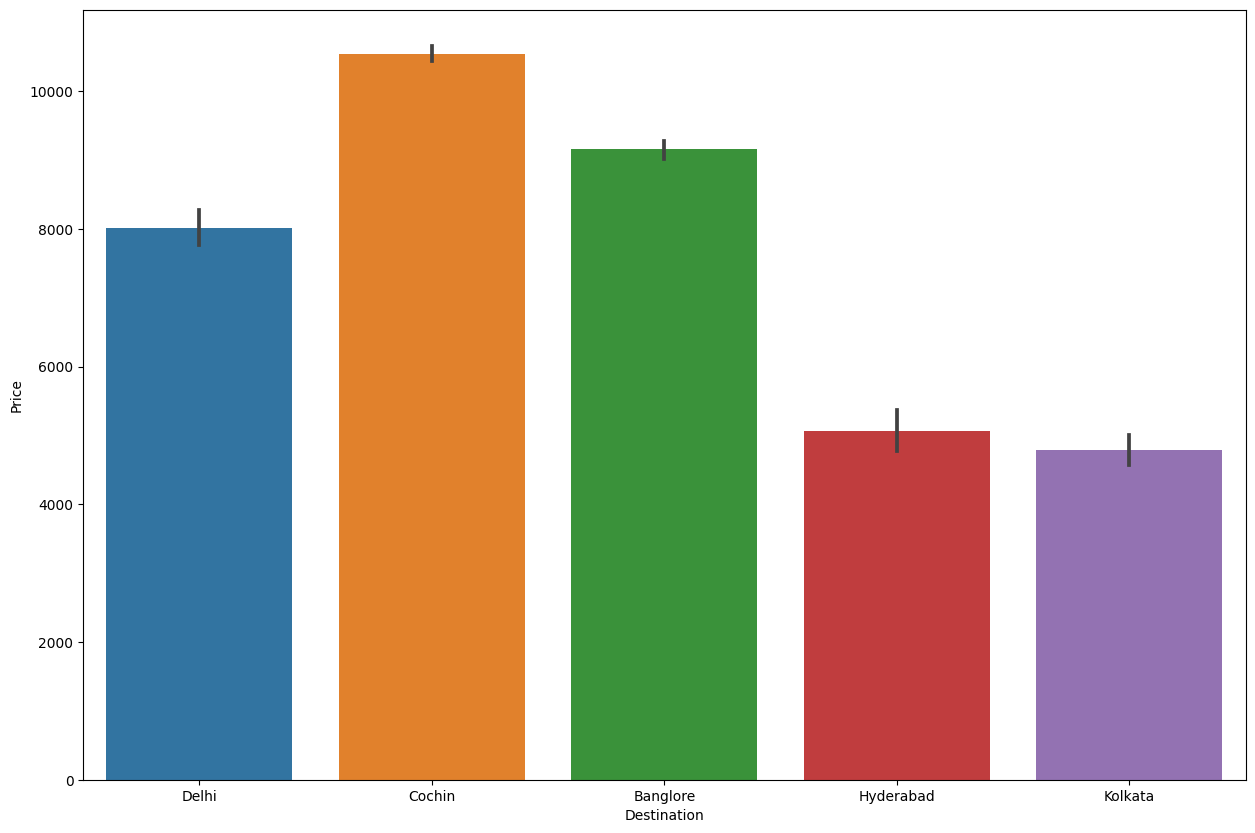

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()

<ipython-input-30-f6412ee67fb3>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



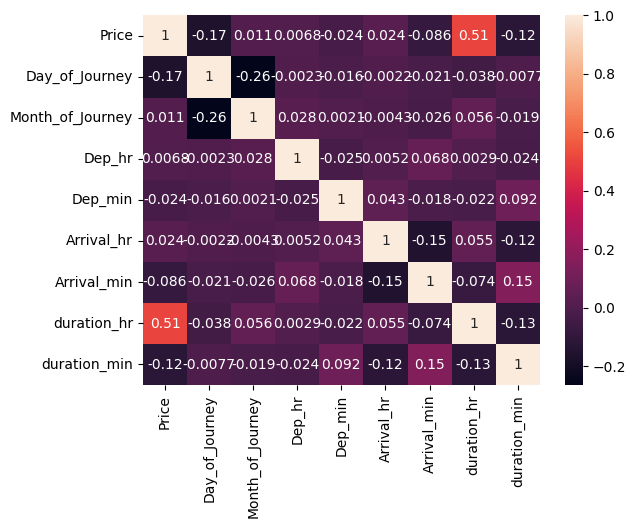

In [30]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [31]:
# Feature Transformation
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)

In [32]:
df.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [33]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [34]:
df_test=pd.read_excel("/content/Test_set.xlsx")
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [35]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

#Dep_time
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

#Splitting duration  time

a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)

<ipython-input-35-e72f9dfd0802>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [36]:
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [37]:
print('train_shape',df.shape)
print('test_shape',df_test.shape)

train_shape (10682, 31)
test_shape (2671, 28)


In [38]:
df.drop('Additional_Info',axis=1,inplace=True)

In [39]:
df.drop('Route',axis=1,inplace=True)

In [40]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,2,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,2,13882,6,9,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,...,1,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,1,13302,3,1,16,50,21,35,4,45


In [41]:
df_test.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,...,Destination_New Delhi,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,dur_hr,dur_min
0,0,0,0,1,0,0,0,0,0,0,...,0,1,6,6,17,30,4,25,10,55
1,0,0,1,0,0,0,0,0,0,0,...,0,1,5,12,6,20,10,20,4,00
2,0,0,0,1,0,0,0,0,0,0,...,0,1,21,5,19,15,19,0,23,45
3,0,0,0,0,0,1,0,0,0,0,...,0,1,21,5,8,0,21,0,13,00
4,0,0,0,0,0,0,0,0,0,0,...,0,0,24,6,23,55,2,45,2,50


In [42]:
x=df.drop('Price',axis=1)
y=df['Price']

In [43]:
x.dtypes

Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Trujet                               uint8
Vistara                              uint8
Vistara Premium economy              uint8
Source_Chennai                       uint8
Source_Delhi                         uint8
Source_Kolkata                       uint8
Source_Mumbai                        uint8
Destination_Cochin                   uint8
Destination_Delhi                    uint8
Destination_Hyderabad                uint8
Destination_Kolkata                  uint8
Total_Stops                          int64
Day_of_Journey                       int64
Month_of_Journey                     int64
Dep_hr                               int64
Dep_min    

In [44]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.0 MB/s eta 0:00:00


In [45]:
  # Model Building
from catboost import CatBoostRegressor
model=CatBoostRegressor()
model.fit(x,y)

Learning rate set to 0.059526
0:	learn: 4439.2898008	total: 54ms	remaining: 54s
1:	learn: 4283.5638002	total: 66.4ms	remaining: 33.1s
2:	learn: 4137.7297211	total: 78.2ms	remaining: 26s
3:	learn: 3997.5515216	total: 105ms	remaining: 26.2s
4:	learn: 3871.1656593	total: 121ms	remaining: 24s
5:	learn: 3748.4456451	total: 136ms	remaining: 22.5s
6:	learn: 3635.6649828	total: 151ms	remaining: 21.5s
7:	learn: 3541.2180418	total: 167ms	remaining: 20.7s
8:	learn: 3452.4411260	total: 190ms	remaining: 20.9s
9:	learn: 3366.8796713	total: 210ms	remaining: 20.8s
10:	learn: 3288.8502990	total: 225ms	remaining: 20.2s
11:	learn: 3220.6084777	total: 239ms	remaining: 19.6s
12:	learn: 3152.2352558	total: 270ms	remaining: 20.5s
13:	learn: 3086.8788991	total: 286ms	remaining: 20.2s
14:	learn: 3026.7113754	total: 299ms	remaining: 19.6s
15:	learn: 2976.4179318	total: 305ms	remaining: 18.8s
16:	learn: 2927.7135295	total: 324ms	remaining: 18.8s
17:	learn: 2885.7655912	total: 340ms	remaining: 18.6s
18:	learn: 28

<Axes: >

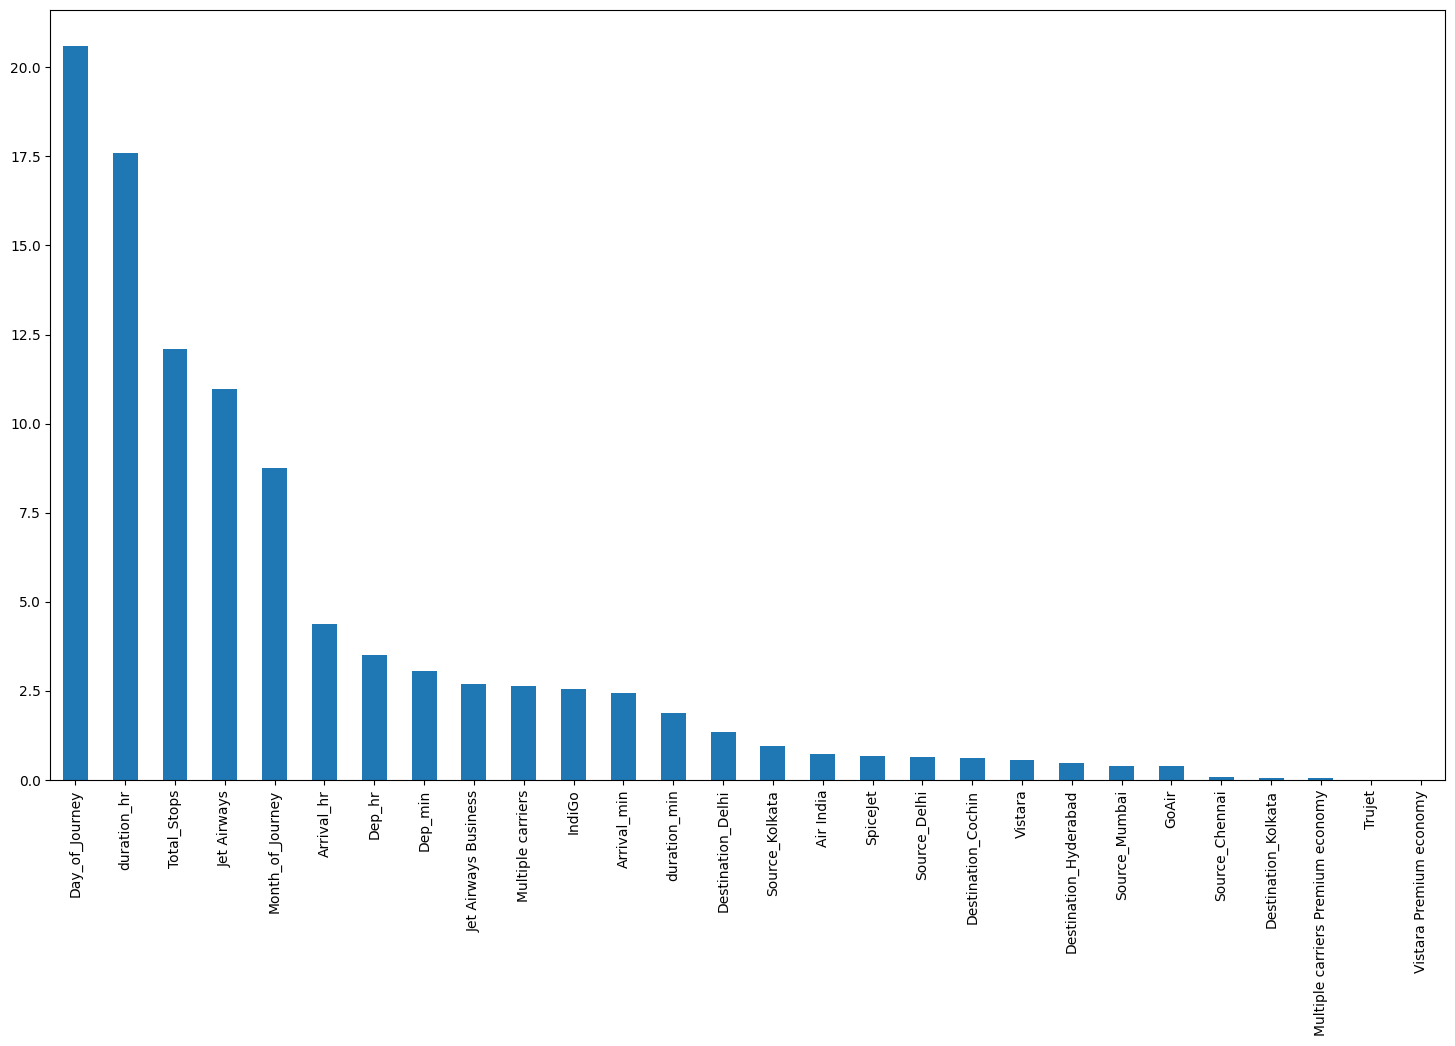

In [46]:
pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))


In [47]:
#splitting the dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import math
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [48]:
model=CatBoostRegressor()
model.fit(x_train,y_train)

Learning rate set to 0.057463
0:	learn: 4465.7280757	total: 1.95ms	remaining: 1.95s
1:	learn: 4317.7245126	total: 4.18ms	remaining: 2.08s
2:	learn: 4167.9871081	total: 6.3ms	remaining: 2.09s
3:	learn: 4030.4839609	total: 8.12ms	remaining: 2.02s
4:	learn: 3906.4844760	total: 10ms	remaining: 2s
5:	learn: 3785.4580402	total: 11.8ms	remaining: 1.95s
6:	learn: 3673.8662552	total: 13.7ms	remaining: 1.95s
7:	learn: 3582.0533069	total: 15.4ms	remaining: 1.92s
8:	learn: 3495.5629367	total: 17.4ms	remaining: 1.92s
9:	learn: 3404.7478335	total: 19.1ms	remaining: 1.89s
10:	learn: 3325.1004431	total: 20.8ms	remaining: 1.87s
11:	learn: 3254.1004651	total: 22.7ms	remaining: 1.87s
12:	learn: 3184.6084064	total: 24.4ms	remaining: 1.85s
13:	learn: 3122.3064005	total: 26.4ms	remaining: 1.86s
14:	learn: 3067.6550706	total: 28.1ms	remaining: 1.84s
15:	learn: 3014.5169632	total: 30.1ms	remaining: 1.85s
16:	learn: 2962.4252595	total: 31.8ms	remaining: 1.84s
17:	learn: 2920.1931240	total: 33.5ms	remaining: 1.

In [49]:
y_pred=model.predict(x_test)
print('R2_Score:',r2_score(y_test,y_pred))
print('RMSE:',math.sqrt(mean_squared_error(y_test,y_pred)))

R2_Score: 0.8273858089678572
RMSE: 1882.6586980704146


In [50]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey', 'Dep_hr',
       'Dep_min', 'Arrival_hr', 'Arrival_min', 'duration_hr', 'duration_min'],
      dtype='object')

In [51]:
len(df.columns)

29

In [52]:
df.to_csv('Deploy_df.csv')

In [53]:
df.to_csv('Test.csv')